#This notebook is supposed to help me create a Mental Health for college Kid predicting sample model

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
mental_health_data = pd.read_csv("D:\wine data\Mental health\Mental Health Dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Admim\AppData\Local\Temp\ipykernel_14196\1928434675.py:1: SyntaxWarning: invalid escape sequence '\w'
  mental_health_data = pd.read_csv("D:\wine data\Mental health\Mental Health Dataset.csv")


In [5]:
mental_health_data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [6]:
# Display basic info and first few rows
mental_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [7]:
# I am converting Converting Timestamp column to datetime format
mental_health_data["Timestamp"] = pd.to_datetime(mental_health_data["Timestamp"], errors="coerce")

# Trying to Extract Year, Month, and Day for trend analysis
mental_health_data["Year"] = mental_health_data["Timestamp"].dt.year
mental_health_data["Month"] = mental_health_data["Timestamp"].dt.month
mental_health_data["Day"] = mental_health_data["Timestamp"].dt.day

# Checking if conversion was successful (copied this somewhere, lol)
mental_health_data[["Timestamp", "Year", "Month", "Day"]].head()


,Timestamp,Year,Month,Day
0,2014-08-27 11:29:00,2014,8,27
1,2014-08-27 11:31:00,2014,8,27
2,2014-08-27 11:32:00,2014,8,27
3,2014-08-27 11:37:00,2014,8,27
4,2014-08-27 11:43:00,2014,8,27


In [8]:
# Listing of Yes/No columns to convert
yes_no_columns = [
    "self_employed", "family_history", "treatment", "Growing_Stress", "Changes_Habits",
    "Mental_Health_History", "Coping_Struggles", "Work_Interest", "Social_Weakness"
]

# Convert Yes/No to 1/0
for col in yes_no_columns:
    mental_health_data[col] = mental_health_data[col].map({"Yes": 1, "No": 0})

# Check if conversion was successful
mental_health_data[yes_no_columns].head()


,self_employed,family_history,treatment,Growing_Stress,Changes_Habits,Mental_Health_History,Coping_Struggles,Work_Interest,Social_Weakness
0,NaN,0,1,1.0,0.0,1.0,0,0.0,1.0
1,NaN,1,1,1.0,0.0,1.0,0,0.0,1.0
2,NaN,1,1,1.0,0.0,1.0,0,0.0,1.0
3,0.0,1,1,1.0,0.0,1.0,0,0.0,1.0
4,0.0,1,1,1.0,0.0,1.0,0,0.0,1.0


In [9]:
mental_health_data = mental_health_data.dropna()


In [10]:
print(mental_health_data.isnull().sum())

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
Year                       0
Month                      0
Day                        0
dtype: int64


In [11]:
# Updated mappings based on the actual values in the dataset
ordinal_mappings = {
    "Mood_Swings": {"Low": 1, "Medium": 2, "High": 3},
    "Days_Indoors": {
        "Go out Every day": 0,
        "1-14 days": 1,
        "15-30 days": 2,
        "31-60 days": 3,
        "More than 2 months": 4
    }
}

categorical_mappings = {
    "mental_health_interview": {"Yes": 1, "No": 0, "Maybe": 2},
    "care_options": {"Yes": 1, "No": 0, "Not sure": 2}
}

# Apply mappings
for col, mapping in ordinal_mappings.items():
    mental_health_data[col] = mental_health_data[col].map(mapping)

for col, mapping in categorical_mappings.items():
    mental_health_data[col] = mental_health_data[col].map(mapping)

# Check the result
print(mental_health_data[["Mood_Swings", "Days_Indoors", "mental_health_interview", "care_options"]].head())


   Mood_Swings  Days_Indoors  mental_health_interview  care_options
3            2             1                        2             1
4            2             1                        0             1
5            2             1                        2             2
6            2             1                        0             2
7            2             1                        0             0


In [12]:
# Summary statistics for numeric variables
summary_stats = mental_health_data.describe()

# Unique value counts for categorical variables
categorical_summary = mental_health_data.nunique()

summary_stats, categorical_summary


(                           Timestamp  self_employed  family_history  \
 count                          37242    37242.00000    37242.000000   
 mean   2014-09-09 10:02:45.969067264        0.10276        0.389426   
 min              2014-08-27 11:35:00        0.00000        0.000000   
 25%              2014-08-27 14:27:00        0.00000        0.000000   
 50%              2014-08-28 02:32:00        0.00000        0.000000   
 75%              2014-08-28 22:46:00        0.00000        1.000000   
 max              2016-02-01 23:04:00        1.00000        1.000000   
 std                              NaN        0.30365        0.487627   
 
           treatment  Days_Indoors  Growing_Stress  Changes_Habits  \
 count  37242.000000  37242.000000    37242.000000    37242.000000   
 mean       0.498926      1.808630        0.537243        0.582810   
 min        0.000000      0.000000        0.000000        0.000000   
 25%        0.000000      1.000000        0.000000        0.000000   


In [13]:
# Identify numeric columns, excluding the timestamp
numeric_columns = mental_health_data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'timestamp']  # Exclude timestamp

# Summary statistics for numeric variables (excluding timestamp)
summary_stats = mental_health_data[numeric_columns].describe()

# Unique value counts for categorical variables (unchanged)
categorical_summary = mental_health_data.nunique()

# Display results
print("Summary Statistics (numeric, excluding timestamp):")
print(summary_stats)
print("\nUnique Value Counts (categorical):")
print(categorical_summary)

Summary Statistics (numeric, excluding timestamp):
       self_employed  family_history     treatment  Days_Indoors  \
count    37242.00000    37242.000000  37242.000000  37242.000000   
mean         0.10276        0.389426      0.498926      1.808630   
std          0.30365        0.487627      0.500006      1.379137   
min          0.00000        0.000000      0.000000      0.000000   
25%          0.00000        0.000000      0.000000      1.000000   
50%          0.00000        0.000000      0.000000      2.000000   
75%          0.00000        1.000000      1.000000      3.000000   
max          1.00000        1.000000      1.000000      4.000000   

       Growing_Stress  Changes_Habits  Mental_Health_History   Mood_Swings  \
count    37242.000000    37242.000000           37242.000000  37242.000000   
mean         0.537243        0.582810               0.481768      1.905295   
std          0.498618        0.493101               0.499674      0.832772   
min          0.000000   

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

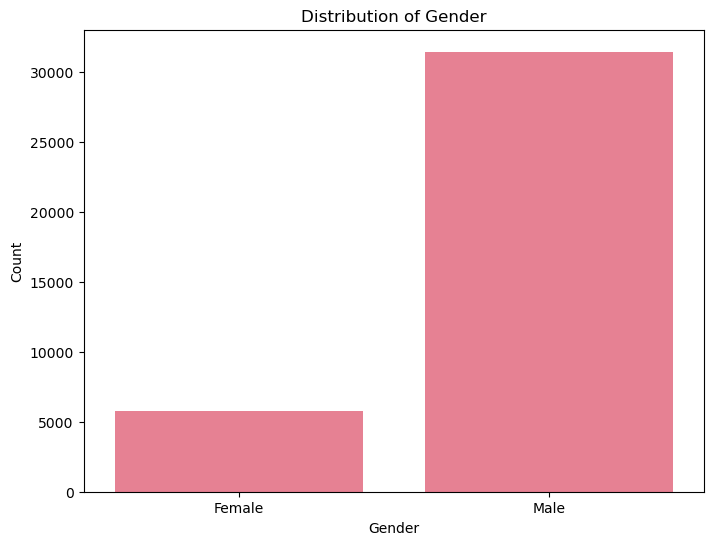

In [15]:
# Set up the plotting style
sns.set_palette("husl")

# 1. Bar Plot: Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=mental_health_data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

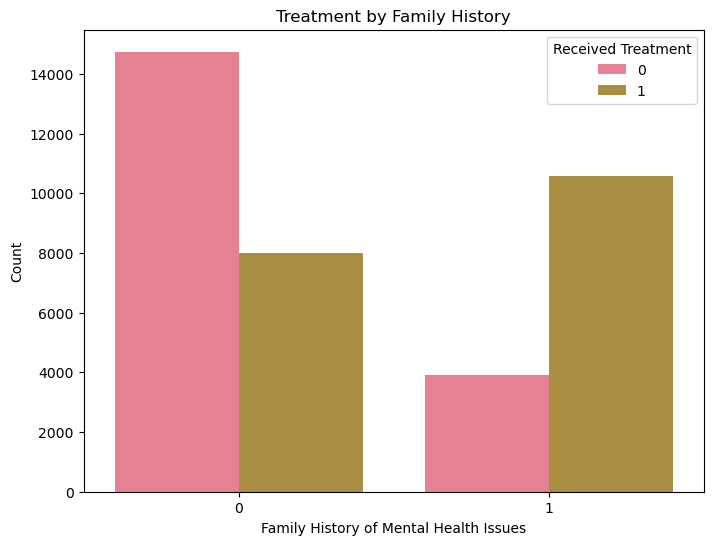

In [16]:

# 2. Bar Plot: Treatment by Family History
plt.figure(figsize=(8, 6))
sns.countplot(x='family_history', hue='treatment', data=mental_health_data)
plt.title('Treatment by Family History')
plt.xlabel('Family History of Mental Health Issues')
plt.ylabel('Count')
plt.legend(title='Received Treatment')
plt.show()

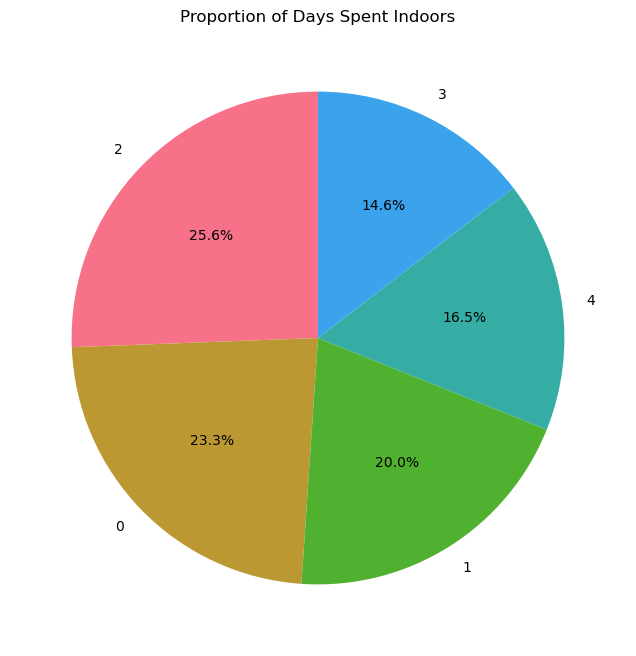

In [17]:
# 3. Pie Chart: Days Indoors
plt.figure(figsize=(8, 8))
mental_health_data['Days_Indoors'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Days Spent Indoors')
plt.ylabel('')  # Hide y-label for pie chart
plt.show()

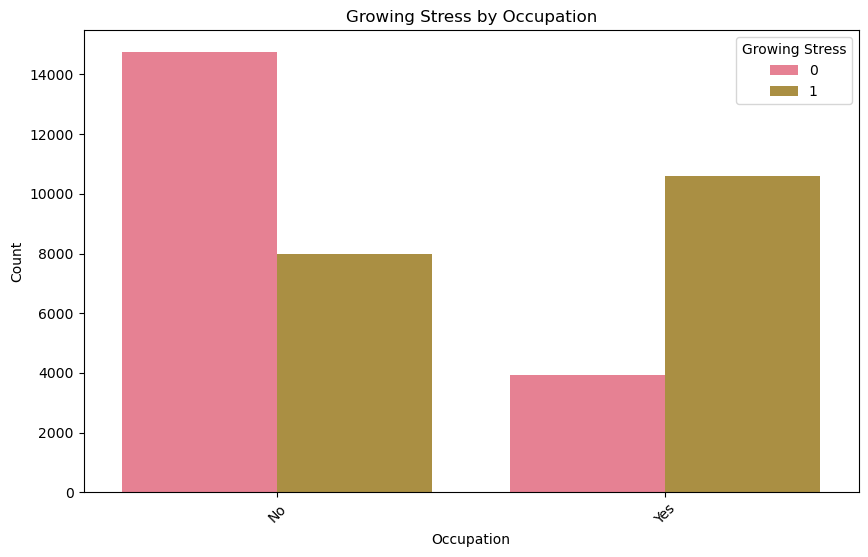

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Count Plot: Growing Stress by Occupation
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='family_history', hue='treatment', data=mental_health_data)
ax.set_xticks([0, 1])  # Positions for 0 and 1
ax.set_xticklabels(['No', 'Yes'])  # Replace with original labels

plt.title('Growing Stress by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Growing Stress')
plt.show()

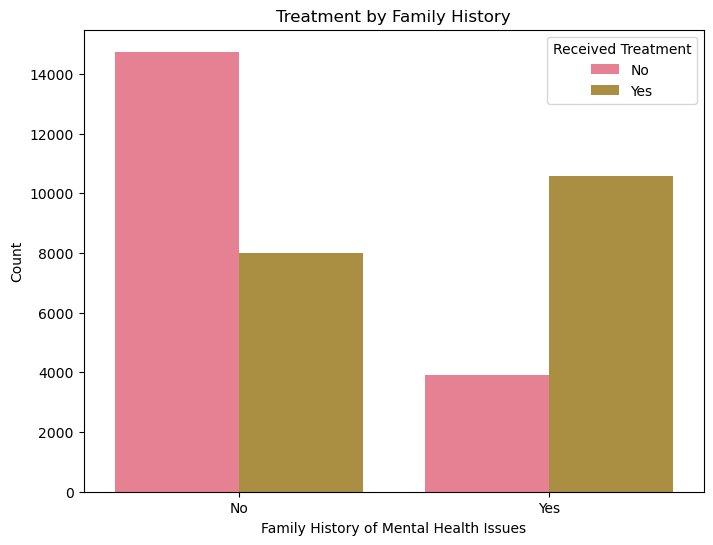

In [19]:
# 2. Bar Plot: Treatment by Family History
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='family_history', hue='treatment', data=mental_health_data)

# Relabel x-axis ticks (family_history)
ax.set_xticks([0, 1])  # Positions for 0 and 1
ax.set_xticklabels(['No', 'Yes'])  # Replace with original labels

# Relabel the legend (treatment)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Received Treatment')

# Set titles and labels
plt.title('Treatment by Family History')
plt.xlabel('Family History of Mental Health Issues')
plt.ylabel('Count')
plt.show()

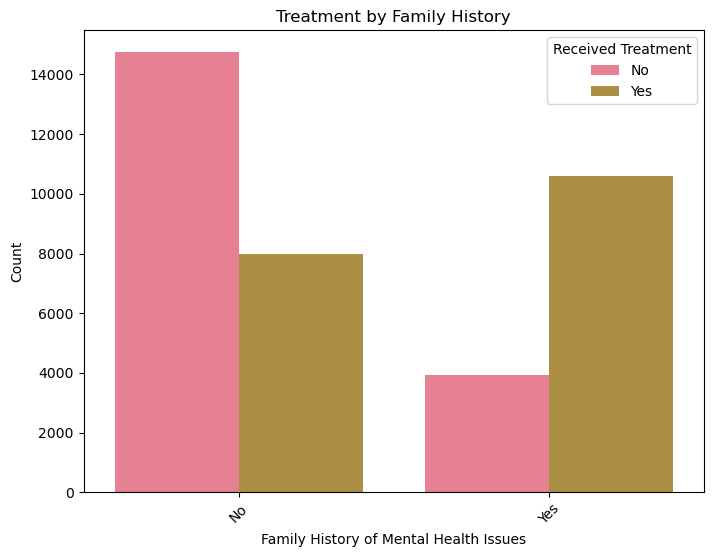

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Bar Plot: Treatment by Family History
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='family_history', hue='treatment', data=mental_health_data)

# Relabel x-axis ticks (family_history)
ax.set_xticks([0, 1])  # Positions for 0 and 1
ax.set_xticklabels(['No', 'Yes'])  # Replace with original labels

# Relabel the legend (treatment)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Received Treatment')

# Set titles and labels
plt.title('Treatment by Family History')
plt.xlabel('Family History of Mental Health Issues')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

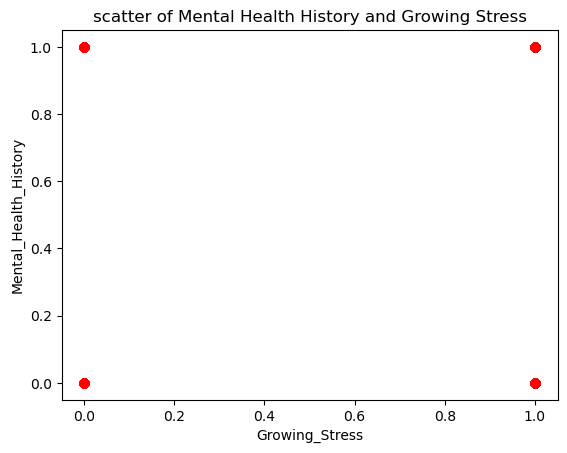

In [21]:
Growing_Stress = mental_health_data["Growing_Stress"]
Mental_Health_History = mental_health_data["Mental_Health_History"]

plt.scatter(Growing_Stress, Mental_Health_History, color="red")
plt.title("scatter of Mental Health History and Growing Stress")
plt.xlabel("Growing_Stress")
plt.ylabel("Mental_Health_History")
plt.show()


In [22]:


# Select numeric columns for correlation
numeric_columns = [
    'self_employed', 'family_history', 'treatment', 'Growing_Stress', 
    'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 
    'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 
    'Days_Indoors', 'mental_health_interview', 'care_options'
]

# Compute the correlation matrix (Pearson)
correlation_matrix = mental_health_data[numeric_columns].corr(method='pearson')

# Display the correlation matrix
print("Correlation Matrix (Pearson):")
print(correlation_matrix)

Correlation Matrix (Pearson):
                         self_employed  family_history  treatment  \
self_employed                 1.000000        0.008826   0.035657   
family_history                0.008826        1.000000   0.369394   
treatment                     0.035657        0.369394   1.000000   
Growing_Stress                0.000350       -0.001064  -0.000917   
Changes_Habits                0.003871       -0.011781  -0.010149   
Mental_Health_History        -0.005792        0.017624   0.015183   
Mood_Swings                  -0.006856        0.020863   0.017974   
Coping_Struggles              0.003029       -0.009219  -0.007942   
Work_Interest                -0.002990        0.009099   0.007839   
Social_Weakness              -0.006658        0.020260   0.017454   
Days_Indoors                 -0.002092        0.006366   0.005485   
mental_health_interview       0.065116       -0.048064  -0.090453   
care_options                 -0.006981       -0.005126   0.027786   

   

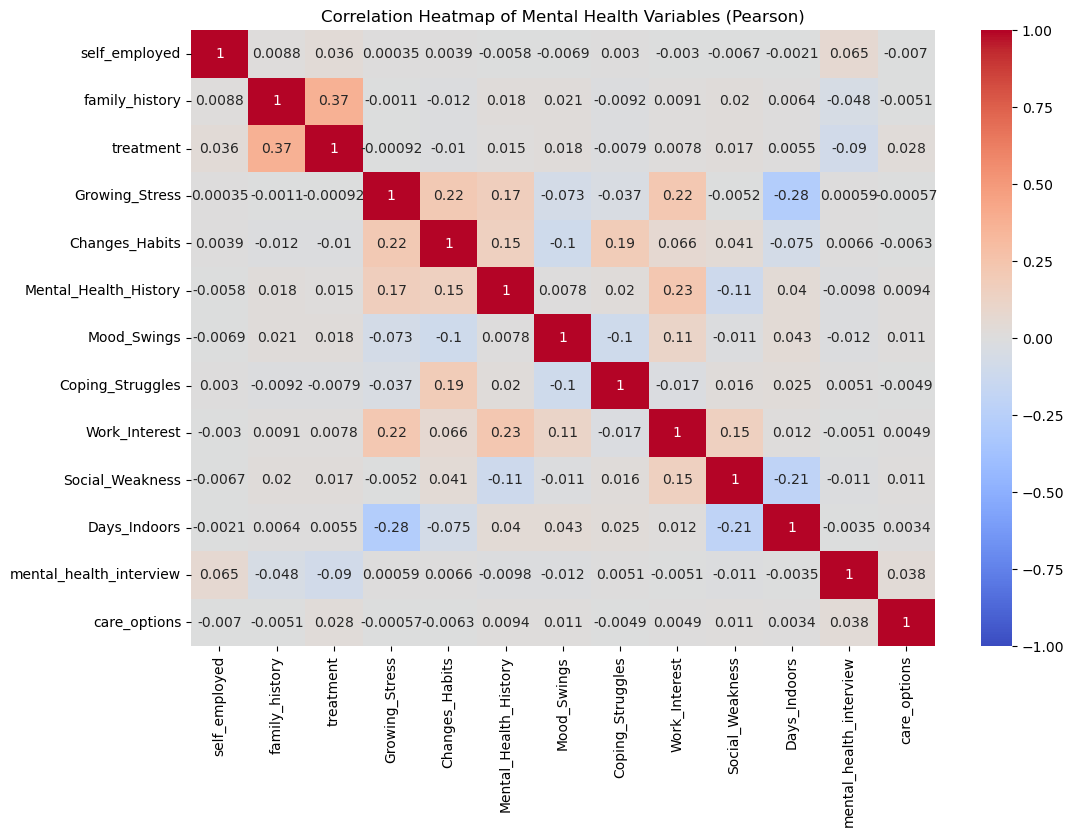

In [23]:
# Plot the heatmap for Pearson correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Mental Health Variables (Pearson)')
plt.show()

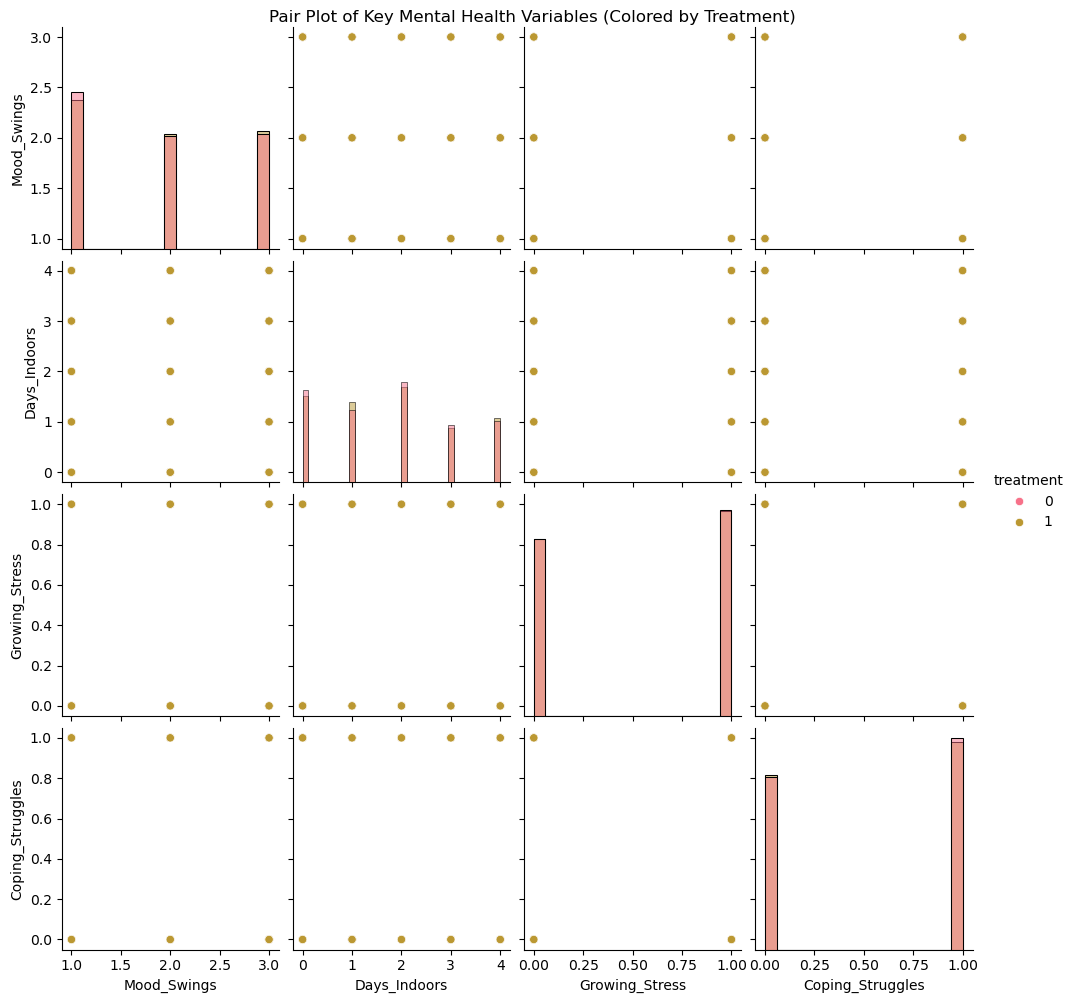

In [24]:
# Select a subset of variables for the pair plot
subset_columns = ['Mood_Swings', 'Days_Indoors','Growing_Stress', 'Coping_Struggles', 'treatment']

# Create a pair plot
sns.pairplot(mental_health_data[subset_columns], hue='treatment', diag_kind='hist')
plt.suptitle('Pair Plot of Key Mental Health Variables (Colored by Treatment)', y=1)
plt.show()

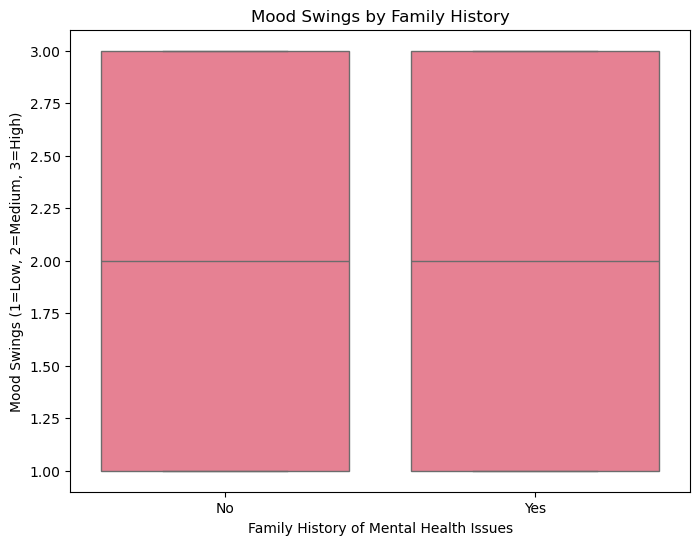

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot: Mood Swings by Family History
plt.figure(figsize=(8, 6))
sns.boxplot(x='family_history', y='Mood_Swings', data=mental_health_data)
plt.title('Mood Swings by Family History')
plt.xlabel('Family History of Mental Health Issues')
plt.ylabel('Mood Swings (1=Low, 2=Medium, 3=High)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Relabel x-axis
plt.show()

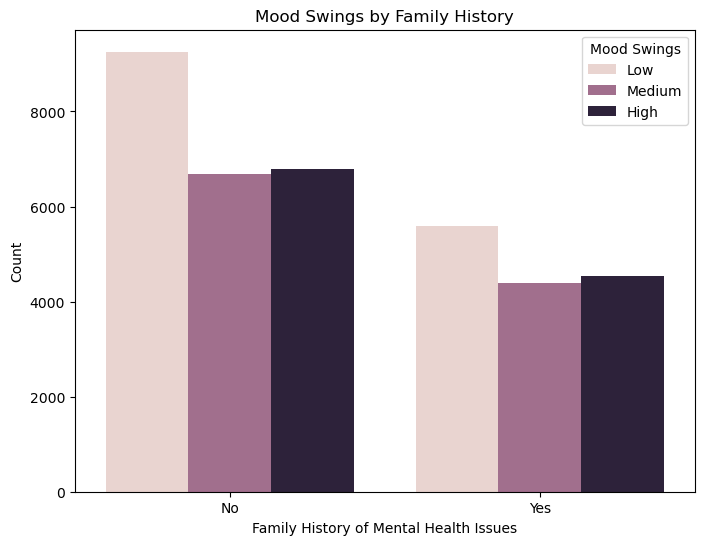

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='family_history', hue='Mood_Swings', data=mental_health_data)
plt.title('Mood Swings by Family History')
plt.xlabel('Family History of Mental Health Issues')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title="Mood Swings", labels=["Low", "Medium", "High"])
plt.show()


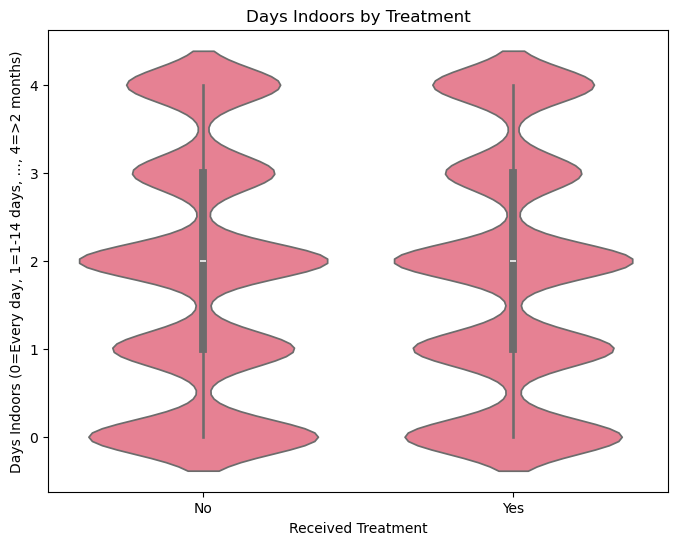

In [27]:
# Violin Plot: Days Indoors by Treatment
plt.figure(figsize=(8, 6))
sns.violinplot(x='treatment', y='Days_Indoors', data=mental_health_data)
plt.title('Days Indoors by Treatment')
plt.xlabel('Received Treatment')
plt.ylabel('Days Indoors (0=Every day, 1=1-14 days, ..., 4=>2 months)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Relabel x-axis
plt.show()

C:\Users\Admim\AppData\Local\Temp\ipykernel_14196\1771967658.py:2: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x='family_history', y='Mood_Swings', data=mental_health_data, inner="stick", bw=0)
c:\Users\Admim\anaconda3\Lib\site-packages\scipy\stats\_kde.py:591: RuntimeWarning: divide by zero encountered in log
  self.log_det = 2*np.log(np.diag(self.cho_cov
c:\Users\Admim\anaconda3\Lib\site-packages\scipy\stats\_kde.py:591: RuntimeWarning: divide by zero encountered in log
  self.log_det = 2*np.log(np.diag(self.cho_cov


LinAlgError: singular matrix: resolution failed at diagonal 0

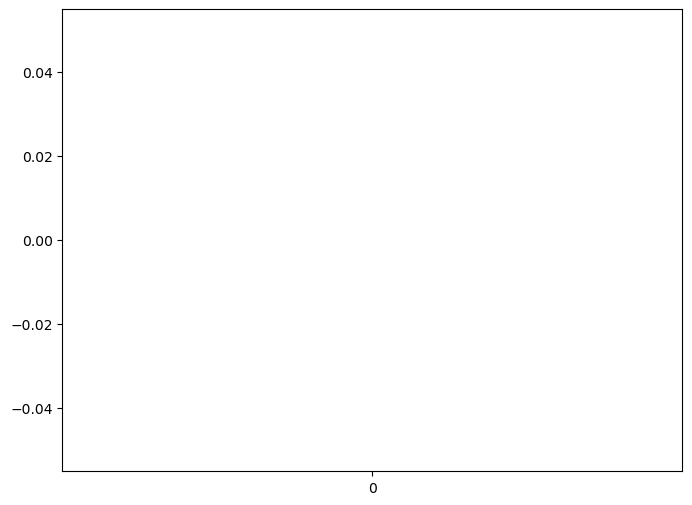

In [28]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='family_history', y='Mood_Swings', data=mental_health_data, inner="stick", bw=0)
plt.title('Mood Swings by Family History')
plt.xlabel('Family History of Mental Health Issues')
plt.ylabel('Mood Swings (1=Low, 2=Medium, 3=High)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


In [ ]:
# Features (exclude target and non-predictive columns like Timestamp)
features = [
    'self_employed', 'family_history', 'Growing_Stress', 'Changes_Habits', 
    'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 
    'Social_Weakness', 'Days_Indoors', 'mental_health_interview', 'care_options'
]
X = mental_health_data[features]
y = mental_health_data['treatment']

# Check for missing values
print("Missing Values in Features:")
print(X.isnull().sum())
print("\nMissing Values in Target:")
print(y.isnull().sum())

Missing Values in Features:
self_employed              0
family_history             0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
Days_Indoors               0
mental_health_interview    0
care_options               0
dtype: int64

Missing Values in Target:
0


In [ ]:
# Impute missing values with the mode
for col in features:
    if X[col].isnull().sum() > 0:
        X[col].fillna(X[col].mode()[0], inplace=True)

# Impute missing values in the target (if any)
if y.isnull().sum() > 0:
    y.fillna(y.mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing Values After Imputation:")
print(X.isnull().sum())
print(y.isnull().sum())


Missing Values After Imputation:
self_employed              0
family_history             0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
Days_Indoors               0
mental_health_interview    0
care_options               0
dtype: int64
0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (29793, 12)
Testing set size: (7449, 12)


Logistic Regression Performance:
Accuracy: 0.6739159618740771

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      3693
           1       0.73      0.56      0.63      3756

    accuracy                           0.67      7449
   macro avg       0.68      0.67      0.67      7449
weighted avg       0.68      0.67      0.67      7449



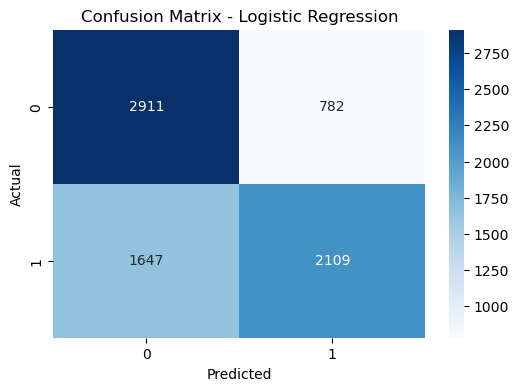

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Performance:
Accuracy: 0.68760907504363

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67      3693
           1       0.67      0.74      0.70      3756

    accuracy                           0.69      7449
   macro avg       0.69      0.69      0.69      7449
weighted avg       0.69      0.69      0.69      7449



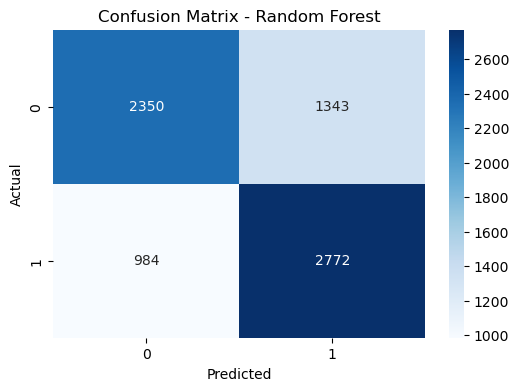

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Feature Importance (Random Forest):
                    Feature  Importance
1            family_history    0.451317
11             care_options    0.271439
10  mental_health_interview    0.083129
9              Days_Indoors    0.041248
0             self_employed    0.039497
5               Mood_Swings    0.024229
3            Changes_Habits    0.015602
6          Coping_Struggles    0.015312
7             Work_Interest    0.015060
4     Mental_Health_History    0.014805
8           Social_Weakness    0.014282
2            Growing_Stress    0.014080


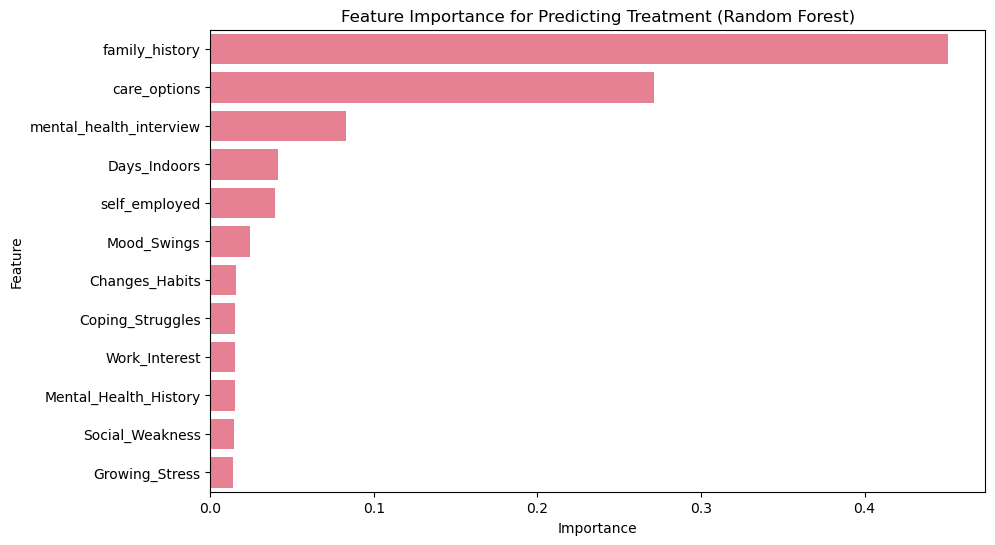

In [ ]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Predicting Treatment (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()